# Project #4: What makes people in a country happy?
## Mohtasim Howlader and Sameer Khan

## Part 1: Exploratory Data Analysis

### Merging and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

from numpy import arange


h_2015 = pd.read_csv("world_happiness/2015.csv")
h_2016 = pd.read_csv("world_happiness/2016.csv")
h_2017 = pd.read_csv("world_happiness/2017.csv")
h_2018 = pd.read_csv("world_happiness/2018.csv")
h_2019 = pd.read_csv("world_happiness/2019.csv")


In [2]:

h_2015=h_2015.replace(0,np.nan)
h_2015 = h_2015.fillna(h_2015.drop(["Country","Region","Happiness Rank"], axis=1).mean())
h_2015.drop(["Region","Standard Error","Dystopia Residual"],axis=1,inplace=True)
h_2015.rename(columns={"Economy (GDP per Capita)":"GDP per capita","Family":"Social Support"},inplace=True)

h_2016 = h_2016.replace(0,np.nan)
h_2016 = h_2016.fillna(h_2016.drop(["Country","Region","Happiness Rank"],axis=1).mean())
h_2016.drop(["Region","Lower Confidence Interval","Upper Confidence Interval","Dystopia Residual"],axis=1,inplace=True)
h_2016.rename(columns={"Economy (GDP per Capita)":"GDP per capita","Family":"Social Support"},inplace=True)

h_2017 = h_2017.replace(0,np.nan)
h_2017 = h_2017.fillna(h_2017.drop(["Country","Happiness.Rank"],axis=1).mean())
h_2017.drop(["Whisker.high","Whisker.low","Dystopia.Residual"],axis=1,inplace=True)
h_2017.rename(columns={"Happiness.Rank":"Happiness Rank","Happiness.Score":"Happiness Score","Economy..GDP.per.Capita.":"GDP per capita","Family":"Social Support","Health..Life.Expectancy.":"Health (Life Expectancy)","Trust..Government.Corruption.":"Trust (Government Corruption)"},inplace=True)


h_2018 = h_2018.replace(0,np.nan)
h_2018 = h_2018.fillna(h_2018.drop(["Overall rank","Country or region"],axis=1).mean())
h_2018.rename(columns={"Overall rank":"Happiness Rank","Country or region":"Country","Score":"Happiness Score","Social support":"Social Support","Healthy life expectancy":"Health (Life Expectancy)","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)"},inplace=True)

h_2019 = h_2019.replace(0,np.nan)
h_2019 = h_2019.fillna(h_2019.drop(["Overall rank","Country or region"],axis=1).mean())
h_2019.rename(columns={"Overall rank":"Happiness Rank","Country or region":"Country","Score":"Happiness Score","Social support":"Social Support","Healthy life expectancy":"Health (Life Expectancy)","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)"},inplace=True)



In [3]:
world_happiness = pd.concat([h_2015,h_2016,h_2017,h_2018,h_2019],keys=["2015","2016","2017","2018","2019"],names=["Year"])
world_happiness = world_happiness.replace("Trinidad & Tobago","Trinidad and Tobago")
world_happiness = world_happiness.replace("Taiwan Province of China","Taiwan")
world_happiness = world_happiness.replace("Somaliland region","Somaliland Region")
world_happiness.replace("Hong Kong S.A.R., China","Hong Kong",inplace=True)
world_happiness.replace("Macedonia","North Macedonia",inplace=True)

#world_happiness.index.unique(level="Year")
#world_happiness.mean().plot(x="Happiness Score")

In [4]:
world_happiness

Country  Happiness Rank  Happiness Score  \
Year                                                                  
2015 0                 Switzerland               1            7.587   
     1                     Iceland               2            7.561   
     2                     Denmark               3            7.527   
     3                      Norway               4            7.522   
     4                      Canada               5            7.427   
...                            ...             ...              ...   
2019 151                    Rwanda             152            3.334   
     152                  Tanzania             153            3.231   
     153               Afghanistan             154            3.203   
     154  Central African Republic             155            3.083   
     155               South Sudan             156            2.853   

          GDP per capita  Social Support  Health (Life Expectancy)   Freedom  \
Year                                                                           
2015 0           1.39651        1.349510                   0.94143  0.665570   
     1           1.30232        1.402230                   0.94784  0.628770   
     2           1.32548        1.360580                   0.87464  0.649380   
     3           1.45900        1.330950                   0.88521  0.669730   
     4           1.32629        1.322610                   0.90563  0.632970   
...                  ...             ...                       ...       ...   
2019 151         0.35900        0.711000                   0.61400  0.555000   
     152         0.47600        0.885000                   0.49900  0.417000   
     153         0.35000        0.517000                   0.36100  0.395103   
     154         0.02600        1.216613                   0.10500  0.225000   
     155         0.30600        0.575000                   0.29500  0.010000   

          Trust (Government Corruption)  Generosity  
Year                                                 
2015 0                          0.41978     0.29678  
     1                          0.14145     0.43630  
     2                          0.48357     0.34139  
     3                          0.36503     0.34699  
     4                          0.32957     0.45811  
...                                 ...         ...  
2019 151                        0.41100     0.21700  
     152                        0.14700     0.27600  
     153                        0.02500     0.15800  
     154                        0.03500     0.23500  
     155                        0.09100     0.20200  

[782 rows x 9 columns]

## Central Tendencies of Happiness Score over the Years

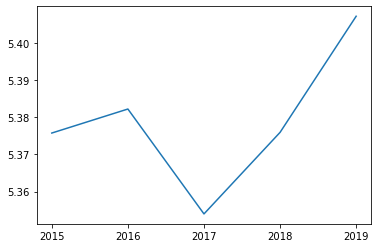

In [5]:
mean_happy = world_happiness["Happiness Score"].groupby(level="Year").mean()
plt.plot(mean_happy.index,mean_happy.values)

In [6]:
count=world_happiness.groupby(["Country"])["Happiness Score"].count()

## Stability of Rankings Through the Years

In [7]:
happiness_std = world_happiness.groupby(["Country"])["Happiness Score"].std()

sdcount = pd.merge(happiness_std,count,left_index=True,right_index=True)
sdcount.sort_values("Happiness Score_x").head(10)
sdcount[sdcount["Happiness Score_y"]==5].sort_values("Happiness Score_x")

,Happiness Score_x,Happiness Score_y
Country,,
Trinidad and Tobago,0.013145,5
Belgium,0.017743,5
New Zealand,0.018221,5
Hong Kong,0.021707,5
Saudi Arabia,0.023896,5
...,...,...
Algeria,0.465170,5
Togo,0.514104,5
Ivory Coast,0.530723,5


In [8]:
h_2015 = h_2015.replace("Trinidad & Tobago", "Trinidad and Tobago")
h_2015 = h_2015.replace("Taiwan Province of China", "Taiwan")
h_2015 = h_2015.replace("Somaliland region", "Somaliland Region")
h_2015 = h_2015.replace("Hong Kong S.A.R., China", "Hong Kong")
h_2015 = h_2015.replace("Macedonia", "North Macedonia")
hap15 = h_2015[["Country", "Happiness Rank"]]
hap15 = hap15.rename(columns = {"Happiness Rank": "Happiness 2015"})

In [9]:
h_2016 = h_2016.replace("Trinidad & Tobago", "Trinidad and Tobago")
h_2016 = h_2016.replace("Taiwan Province of China", "Taiwan")
h_2016 = h_2016.replace("Somaliland region", "Somaliland Region")
h_2016 = h_2016.replace("Hong Kong S.A.R., China", "Hong Kong")
h_2016 = h_2016.replace("Macedonia", "North Macedonia")
hap16 = h_2016[["Country", "Happiness Rank"]]
hap16 = hap16.rename(columns = {"Happiness Rank": "Happiness 2016"})

In [10]:
merged=pd.merge(hap15,hap16,on="Country")

In [11]:
h_2017 = h_2017.replace("Trinidad & Tobago", "Trinidad and Tobago")
h_2017 = h_2017.replace("Taiwan Province of China", "Taiwan")
h_2017 = h_2017.replace("Somaliland region", "Somaliland Region")
h_2017 = h_2017.replace("Hong Kong S.A.R., China", "Hong Kong")
h_2017 = h_2017.replace("Macedonia", "North Macedonia")
hap17 = h_2017[["Country", "Happiness Rank"]]
hap17 = hap17.rename(columns = {"Happiness Rank": "Happiness 2017"})

In [12]:
h_2018 = h_2018.replace("Trinidad & Tobago", "Trinidad and Tobago")
h_2018 = h_2018.replace("Taiwan Province of China", "Taiwan")
h_2018 = h_2018.replace("Somaliland region", "Somaliland Region")
h_2018 = h_2018.replace("Hong Kong S.A.R., China", "Hong Kong")
h_2018 = h_2018.replace("Macedonia", "North Macedonia")
hap18 = h_2018[["Country", "Happiness Rank"]]
hap18 = hap18.rename(columns = {"Happiness Rank": "Happiness 2018"})

In [13]:
h_2019 = h_2019.replace("Trinidad & Tobago", "Trinidad and Tobago")
h_2019 = h_2019.replace("Taiwan Province of China", "Taiwan")
h_2019 = h_2019.replace("Somaliland region", "Somaliland Region")
h_2019 = h_2019.replace("Hong Kong S.A.R., China", "Hong Kong")
h_2019 = h_2019.replace("Macedonia", "North Macedonia")
hap19 = h_2019[["Country", "Happiness Rank"]]
hap19 = hap19.rename(columns = {"Happiness Rank": "Happiness 2019"})

## Countries that improved their rankings the most

In [14]:
merged = merged.merge(hap17, on = "Country")
merged = merged.merge(hap18, on = "Country")
merged = merged.merge(hap19, on = "Country")
merged["Diff"] = merged["Happiness 2019"] - merged ["Happiness 2015"]
merged.sort_values("Diff")

,Country,Happiness 2015,Happiness 2016,Happiness 2017,Happiness 2018,Happiness 2019,Diff
141,Benin,155,153,143,136,102,-53
137,Ivory Coast,151,139,128,107,99,-52
96,Honduras,105,104,91,72,59,-46
95,Hungary,104,91,75,69,62,-42
130,Gabon,143,134,118,103,104,-39
...,...,...,...,...,...,...,...
107,Liberia,116,150,148,149,141,25
109,Haiti,119,136,145,148,147,28
106,Zimbabwe,115,131,138,144,146,31
81,Zambia,85,106,116,125,138,53


In [15]:
#Benin, Ivory Coast, and Honduras were among countries that improved their happiness rank the most

## Relationship between happiness score and other features

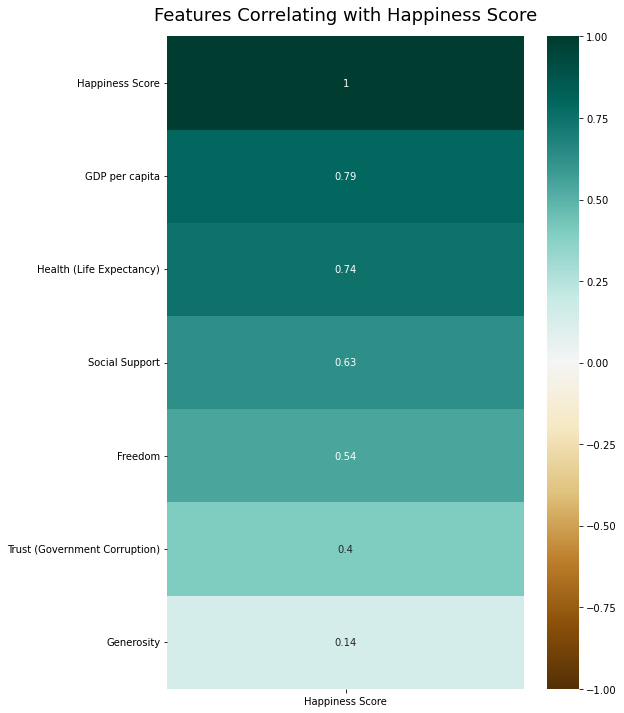

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(world_happiness.drop("Happiness Rank",axis=1).corr()[['Happiness Score']].sort_values(by='Happiness Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Happiness Score', fontdict={'fontsize':18}, pad=16);

The features that are most correlated with happiness are GDP Per Capita, Health (Life Expectancy), and Social Support. If I were a President of a country, I would invest more funding and resources into my country's healthcare infrastructure. I would push for policies like universal healthcare to ensure all of my citizens' health are properly taken care of with minimal stress and burden for them (otherwise the effect on happiness would be mitigated). Furthermore I should implement policies to support social services for low-income families as that would prevent families from being broken up which causes social support to drop.

## Modeling 

In [17]:
#Building training and testing set

world_happy = world_happiness.reset_index(level="Year")
training_main = world_happy[world_happy["Year"]!='2019']


testing_main = world_happy[world_happy["Year"]=='2019']

training_happiness = training_main["Happiness Score"]
testing_happiness = testing_main["Happiness Score"]

training=training_main.drop(["Happiness Rank","Happiness Score","Country","Year"],axis=1)
testing= testing_main.drop(["Happiness Rank","Happiness Score","Country","Year"],axis=1)

### Linear Regression

In [18]:
model = LinearRegression()
model.fit(training,training_happiness)
linear_predictions = model.predict(testing)
rmse = np.sqrt(metrics.mean_squared_error(testing_happiness, linear_predictions))
rmse


0.5612163530789694

## RMSE of Linear Regression: 0.5612

In [19]:
linearpd = pd.DataFrame(linear_predictions,columns=["Predicted Happiness Score(Linear Regression)"])
linearpd["Country"] = testing_main["Country"]
linearpd["Actual Happiness Score"]=testing_main["Happiness Score"]
linearpd["Actual Rank"] = testing_main["Happiness Rank"]
linearpd=linearpd.sort_values(["Predicted Happiness Score(Linear Regression)"],ascending=False)
linearpd = linearpd.reset_index()
linearpd = linearpd.drop("index",axis=1)
linearpd["Predicted Rank"]=linearpd.index+1
linearpd = linearpd.reindex(columns=['Country','Actual Happiness Score', 'Predicted Happiness Score(Linear Regression)','Actual Rank','Predicted Rank'])
linearpd


,Country,Actual Happiness Score,Predicted Happiness Score(Linear Regression),Actual Rank,Predicted Rank
0,Singapore,6.262,7.547694,34,1
1,Norway,7.554,7.349994,3,2
2,Switzerland,7.480,7.262355,6,3
3,Luxembourg,7.090,7.231674,14,4
4,Denmark,7.600,7.220232,2,5
...,...,...,...,...,...
151,Haiti,3.597,3.848678,147,152
152,Chad,4.350,3.648411,132,153
153,Central African Republic,3.083,3.509104,155,154
154,Burundi,3.775,3.500719,145,155


## Lasso Regression

In [20]:
model = linear_model.Lasso(alpha=0.1)
model.fit(training,training_happiness)
lasso_predictions = model.predict(testing)
rmse = np.sqrt(metrics.mean_squared_error(testing_happiness, lasso_predictions))
rmse


0.7063287676790698

## RMSE of Lasso Regression: 0.7063

In [21]:
linearpd = pd.DataFrame(lasso_predictions,columns=["Predicted Happiness Score(Lasso Regression)"])
linearpd["Country"] = testing_main["Country"]
linearpd["Actual Happiness Score"]=testing_main["Happiness Score"]
linearpd["Actual Rank"] = testing_main["Happiness Rank"]
linearpd=linearpd.sort_values(["Predicted Happiness Score(Lasso Regression)"],ascending=False)
linearpd = linearpd.reset_index()
linearpd = linearpd.drop("index",axis=1)
linearpd["Predicted Rank"]=linearpd.index+1
linearpd = linearpd.reindex(columns=['Country','Actual Happiness Score', 'Predicted Happiness Score(Lasso Regression)','Actual Rank','Predicted Rank'])
linearpd

,Country,Actual Happiness Score,Predicted Happiness Score(Lasso Regression),Actual Rank,Predicted Rank
0,Qatar,6.374,6.576605,29,1
1,Luxembourg,7.090,6.484375,14,2
2,Singapore,6.262,6.425216,34,3
3,Ireland,7.021,6.325459,16,4
4,Norway,7.554,6.312581,3,5
...,...,...,...,...,...
151,Niger,4.628,4.122815,114,152
152,Congo (Kinshasa),4.418,4.104091,127,153
153,Liberia,3.975,4.043459,141,154
154,Central African Republic,3.083,4.012252,155,155


## Ridge Regression

In [22]:
model = linear_model.Ridge(alpha=2)
model.fit(training,training_happiness)
ridge_predictions = model.predict(testing)
rmse = np.sqrt(metrics.mean_squared_error(testing_happiness, ridge_predictions))
print(rmse)
print(model.coef_)
formula=model.coef_


0.5608537272501836
[1.13436904 0.64033743 1.22851097 1.22803108 0.74020044 0.50501082]


## RMSE of Ridge Regression: 0.5609

In [23]:
linearpd = pd.DataFrame(ridge_predictions,columns=["Predicted Happiness Score(Ridge Regression)"])
linearpd["Country"] = testing_main["Country"]
linearpd["Actual Happiness Score"]=testing_main["Happiness Score"]
linearpd["Actual Rank"] = testing_main["Happiness Rank"]
linearpd=linearpd.sort_values(["Predicted Happiness Score(Ridge Regression)"],ascending=False)
linearpd = linearpd.reset_index()
linearpd = linearpd.drop("index",axis=1)
linearpd["Predicted Rank"]=linearpd.index+1
linearpd = linearpd.reindex(columns=['Country','Actual Happiness Score', 'Predicted Happiness Score(Ridge Regression)','Actual Rank','Predicted Rank'])
linearpd

,Country,Actual Happiness Score,Predicted Happiness Score(Ridge Regression),Actual Rank,Predicted Rank
0,Singapore,6.262,7.477893,34,1
1,Norway,7.554,7.294800,3,2
2,Switzerland,7.480,7.206959,6,3
3,Luxembourg,7.090,7.194498,14,4
4,Denmark,7.600,7.158586,2,5
...,...,...,...,...,...
151,Niger,4.628,3.863922,114,152
152,Chad,4.350,3.695973,132,153
153,Central African Republic,3.083,3.559588,155,154
154,Burundi,3.775,3.498697,145,155


## Formula for Happiness Score

In [24]:
#Formula for Happiness
print("The formula is: (" + str(round(formula[0],3)) + ")GDP_per_capita + (" + str(round(formula[1],3)) + ")Social_support + (" + str(round(formula[2],3)) + ")Life_Expectancy + (" + str(round(formula[3],3)) +  ")Freedom + (" + str(round(formula[4],3)) + ")Generosity + (" + str(round(formula[5],3)) + ")Corruption")

The formula is: (1.134)GDP_per_capita + (0.64)Social_support + (1.229)Life_Expectancy + (1.228)Freedom + (0.74)Generosity + (0.505)Corruption
